In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df=pd.read_csv('data/Real-Data/Real_Combine.csv')

In [4]:
df.head()

,T,TM,Tm,H,PP,VV,V,VM,PM 2.5
0,23.4,30.3,19.0,59.0,0.0,6.3,4.3,5.4,284.795833
1,22.4,30.3,16.9,57.0,0.0,6.9,3.3,7.6,219.720833
2,24.0,31.8,16.9,51.0,0.0,6.9,2.8,5.4,182.187500
3,22.8,30.2,17.6,55.0,0.0,7.7,3.7,7.6,154.037500
4,23.1,30.6,17.4,46.0,0.0,6.9,3.3,5.4,223.208333


In [5]:
#chechk for null values
df.isnull().sum()

T         0
TM        0
Tm        0
H         0
PP        0
VV        0
V         0
VM        0
PM 2.5    1
dtype: int64

In [6]:
#drop null values
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

T         0
TM        0
Tm        0
H         0
PP        0
VV        0
V         0
VM        0
PM 2.5    0
dtype: int64

In [11]:
#summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 702 entries, 0 to 702
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       702 non-null    float64
 1   TM      702 non-null    float64
 2   Tm      702 non-null    float64
 3   H       702 non-null    float64
 4   PP      702 non-null    float64
 5   VV      702 non-null    float64
 6   V       702 non-null    float64
 7   VM      702 non-null    float64
 8   PM 2.5  702 non-null    float64
dtypes: float64(9)
memory usage: 54.8 KB


In [13]:
df.shape

(702, 9)

In [15]:
#independant featurd
x=df.iloc[:,:-1]

#Independant features
y=df.iloc[:,-1]

In [16]:
x.head()

,T,TM,Tm,H,PP,VV,V,VM
0,23.4,30.3,19.0,59.0,0.0,6.3,4.3,5.4
1,22.4,30.3,16.9,57.0,0.0,6.9,3.3,7.6
2,24.0,31.8,16.9,51.0,0.0,6.9,2.8,5.4
3,22.8,30.2,17.6,55.0,0.0,7.7,3.7,7.6
4,23.1,30.6,17.4,46.0,0.0,6.9,3.3,5.4


In [17]:
y.head()

0    284.795833
1    219.720833
2    182.187500
3    154.037500
4    223.208333
Name: PM 2.5, dtype: float64

In [18]:
#co relation between parameters
# -.17 mean 17% probability that pm2.5 will decrease when H increase
df.corr()

,T,TM,Tm,H,PP,VV,V,VM,PM 2.5
T,1.000000,0.885173,0.775227,-0.481617,-0.083672,0.304036,-0.047081,-0.013871,-0.381870
TM,0.885173,1.000000,0.515374,-0.665344,-0.078372,0.287929,-0.216516,-0.148051,-0.209552
Tm,0.775227,0.515374,1.000000,0.096352,0.017730,0.107315,0.223590,0.197512,-0.523892
H,-0.481617,-0.665344,0.096352,1.000000,0.289521,-0.287302,0.373491,0.294318,-0.178816
PP,-0.083672,-0.078372,0.017730,0.289521,1.000000,-0.093455,-0.055350,-0.033991,-0.109039
VV,0.304036,0.287929,0.107315,-0.287302,-0.093455,1.000000,0.025249,0.010176,-0.153117
V,-0.047081,-0.216516,0.223590,0.373491,-0.055350,0.025249,1.000000,0.786818,-0.395819
VM,-0.013871,-0.148051,0.197512,0.294318,-0.033991,0.010176,0.786818,1.000000,-0.340530
PM 2.5,-0.381870,-0.209552,-0.523892,-0.178816,-0.109039,-0.153117,-0.395819,-0.340530,1.000000


# Linear Regression

E:\softwares\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

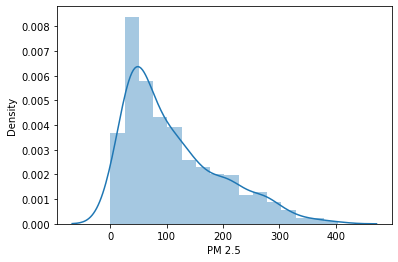

In [21]:
sns.distplot(y)

# Train Test Split

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=0)

from sklearn.linear_model import LinearRegression

In [27]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [28]:
model.coef_

array([-17.89413068,  -0.80513503,  -0.68933822,  -1.73228697,
        -0.83556495, -11.09271015, -11.4682898 ,   0.2321522 ])

In [30]:
model.intercept_

808.9591701357589

# #model Evaluation

In [33]:
#R2 value
print("Coefficient of determination R^2 <-- on train set: {}".format(model.score(x_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.3919500377041385


In [34]:
#R2 value for test data
print("Coefficient of determination R^2 <-- on train set: {}".format(model.score(x_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.41813442226426245


In [36]:
#score of the model is very bad
model.score(x_test,y_test)

0.41813442226426245

In [38]:
# chechking cross validation score, it will be near R2
from sklearn.model_selection import cross_val_score
score=cross_val_score(model,x,y,cv=5)

In [39]:
score.mean()

0.27810664743545105

In [41]:
prediction=model.predict(x_test)

E:\softwares\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

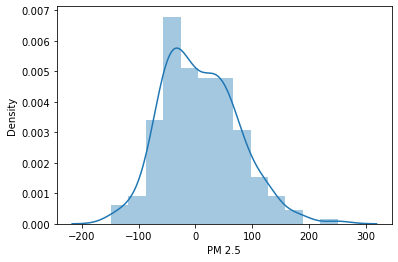

In [48]:
# if bell curve thn good
sns.distplot(y_test-prediction)

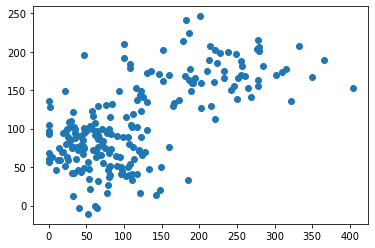

In [42]:
# graph between y test and predicted value
plt.scatter(y_test,prediction)

calculation of loss

In [43]:
from sklearn import metrics

In [44]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 53.47890698219493
MSE: 4429.903806686159
RMSE: 66.55752254017692


# Conclusion 

model is predicting very badly as it only have 41% accuracy ,so we will not use it for prediction

In [45]:
import pickle 

In [47]:
# open a file, where you ant to store the data
file = open('regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(model, file)